In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.feature_selection import mutual_info_classif, SelectKBest

#from sklearn.manifold import TNSE
from sklearn.manifold import LocallyLinearEmbedding, Isomap, SpectralEmbedding, TSNE

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding, Isomap
from umap import UMAP

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import math as math
from scipy.stats import boxcox
from random import randrange
from random import seed
from random import random
from random import gauss
import os
from scipy import signal

from scipy import fftpack

def plot_fft(x_in, filename=None):
    f = 50
    f_s = 1/f
    X = fftpack.fft(x_in)
    freqs = fftpack.fftfreq(len(x_in)) * f_s
    f, (ax0, ax1) = plt.subplots(2, 1)

    ax0.plot(x_in)
    ax0.set_ylim(0.0, 1.1)

    ax1.plot(fftpack.fftfreq(len(x_in)), np.abs(X))
    ax1.set_ylim(0, 10);
    if filename is not None:
        plt.savefig(filename)

#fig, ax = pl
def plot_stft(X, nperseg=256, title='', filename=None):
    f, t, Zxx = signal.stft(X, fs=1/50, nperseg=nperseg)
    amp = f.max()*10
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    #plt.plot(f.max()*df['gps_speed(m/s)']/df['gps_speed(m/s)'].max())
    if filename is not None:
        plt.savefig(filename)
    plt.show()


def plot_spectrogram(x_in, filename=None):
    freqs, times, spectrogram = signal.spectrogram(x_in, fs=1/50, window='hann')

    plt.figure(figsize=(5, 4))
    plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
    plt.title('Spectrogram')
    plt.ylabel('Frequency band')
    plt.xlabel('Time window')
    plt.tight_layout()
    if filename is not None:
        plt.savefig(filename)
    
def plot_density(x_in, title='', filename=None):
    freqs, psd = signal.welch(x_in, fs=50, )
    plt.figure(figsize=(5, 4))
    plt.semilogx(freqs, psd)
    plt.title('PSD: power spectral density - ' + title)
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.tight_layout()
    if filename is not None:
        plt.savefig(filename)
        
        
def plot_ts(x_in, title='', filename=None):
    plt.figure(figsize=(15, 10))
    x_in.plot()
    plt.title(title)
    if filename is not None:
        plt.savefig(filename)

In [3]:
x_train_561 =  np.loadtxt('UCI HAR Dataset/train/X_train.txt', dtype=np.float32)
x_train_561_arr =  np.loadtxt('UCI HAR Dataset/train/X_train.txt', dtype=np.float32)

train_subject = np.loadtxt('UCI HAR Dataset/train/subject_train.txt', dtype=np.int32)
train_subject_arr = np.loadtxt('UCI HAR Dataset/train/subject_train.txt', dtype=np.int32)

y_train = np.loadtxt('UCI HAR Dataset/train/y_train.txt', dtype=np.int32).reshape(-1,1)
y_train_arr = np.loadtxt('UCI HAR Dataset/train/y_train.txt', dtype=np.int32).reshape(-1,1)

In [4]:
x_train_cols = open("UCI HAR Dataset/features.txt")
file_contents = x_train_cols.read()
contents_split = file_contents.splitlines()

In [7]:
x_train_561 = pd.DataFrame(x_train_561)
x_train_561.columns = contents_split
y_train = pd.DataFrame(y_train, columns=['class'])
train_subject = pd.DataFrame(train_subject, columns=['subjects'])

df_train = x_train_561.join([y_train, train_subject])
display(df_train.head())

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",class,subjects
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943067,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989303,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5,1


In [8]:
x_test_561 =  np.loadtxt('UCI HAR Dataset/test/X_test.txt', dtype=np.float32)
x_test_561_arr =  np.loadtxt('UCI HAR Dataset/test/X_test.txt', dtype=np.float32)

test_subject = np.loadtxt('UCI HAR Dataset/test/subject_test.txt', dtype=np.int32)
test_subject_arr = np.loadtxt('UCI HAR Dataset/test/subject_test.txt', dtype=np.int32)

y_test = np.loadtxt('UCI HAR Dataset/test/y_test.txt', dtype=np.int32).reshape(-1,1)
y_test_arr = np.loadtxt('UCI HAR Dataset/test/y_test.txt', dtype=np.int32).reshape(-1,1)

x_test_561 = pd.DataFrame(x_test_561)
x_test_561.columns = contents_split
y_test = pd.DataFrame(y_test, columns=['class'])
test_subject = pd.DataFrame(test_subject, columns=['subjects'])
#print(x_test_561.columns)

df_test = x_train_561.join([y_test, test_subject])
display(df_test.head())

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",class,subjects
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5.0,2.0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943067,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5.0,2.0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5.0,2.0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989303,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5.0,2.0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5.0,2.0


### 2.1.1 & 2.1.2

In [9]:
display(x_train_561.describe())
display(x_train_561.isna().sum())
display(x_train_561[x_train_561.duplicated()==True])
display(x_train_561[x_train_561.count(axis=1) < 561])

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510937,-0.604754,-0.630512,-0.526908,-0.606150,-0.468605,...,0.125294,-0.307009,-0.625295,0.008684,0.002186,0.008726,-0.005981,-0.489548,0.058593,-0.056515
std,0.070261,0.040810,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414121,0.544547,...,0.250994,0.321011,0.307584,0.336786,0.448306,0.608303,0.477975,0.511808,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


1 tBodyAcc-mean()-X                         0
2 tBodyAcc-mean()-Y                         0
3 tBodyAcc-mean()-Z                         0
4 tBodyAcc-std()-X                          0
5 tBodyAcc-std()-Y                          0
                                           ..
557 angle(tBodyGyroMean,gravityMean)        0
558 angle(tBodyGyroJerkMean,gravityMean)    0
559 angle(X,gravityMean)                    0
560 angle(Y,gravityMean)                    0
561 angle(Z,gravityMean)                    0
Length: 561, dtype: int64

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"


There are 7352 total entries, with the abosulte minimum and maximum values possible being [-1, 1]. There are no duplicate values, and there are further no missing entries in any instance of the data. Each vector is 561 in length, excluding the class and subject labels.

### 2.1.3

Text(0, 0.5, 'Number of Values')

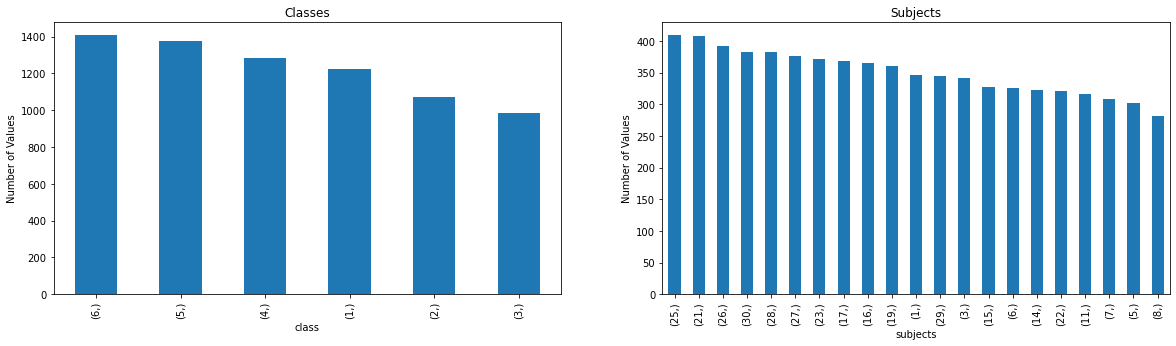

In [197]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))
y_train.value_counts().plot.bar(ax=ax1)#(kind='bar', ax=ax1)
train_subject.value_counts().plot.bar(ax=ax2)#(kind='bar', ax=ax2)
ax1.set_title('Classes')
ax1.set_ylabel('Number of Values')
ax2.set_title('Subjects')
ax2.set_ylabel('Number of Values')

There are a total of six classes and thirty subjects. Class 6 has the most data with 1407, while class 3 has the least with 986. The subject represented by 25 had the most data recorder with 409, and the subject represented by y had the least data recorder with only 281. Below find descriptions of the class and subjects.

In [11]:
display(df_train.groupby('class').describe())
display(df_train.groupby('subjects').describe())

1 tBodyAcc-mean()-X                                                    \
                    count      mean       std       min       25%       50%   
class                                                                         
1                  1226.0  0.276260  0.050353  0.121465  0.240004  0.274582   
2                  1073.0  0.261929  0.078029 -0.061041  0.214435  0.266666   
3                   986.0  0.288169  0.095101 -0.161088  0.222770  0.284955   
4                  1286.0  0.273449  0.041998 -0.412659  0.274417  0.277306   
5                  1374.0  0.279294  0.020097  0.111231  0.274952  0.277507   
6                  1407.0  0.269191  0.101541 -1.000000  0.268208  0.276946   

                          2 tBodyAcc-mean()-Y            ...  \
            75%       max               count      mean  ...   
class                                                    ...   
1      0.311642  0.433256              1226.0 -0.017768  ...   
2      0.313335  0.480180              1073.0 -0.026647  ...   
3      0.357571  0.617597               986.0 -0.016370  ...   
4      0.280230  0.559135              1286.0 -0.012143  ...   
5      0.280299  0.631510              1374.0 -0.016123  ...   
6      0.283663  1.000000              1407.0 -0.018345  ...   

      561 angle(Z,gravityMean)           subjects                            \
                           75%       max    count       mean       std  min   
class                                                                         
1                     0.138474  0.362180   1226.0  16.462480  9.367106  1.0   
2                     0.253339  0.488889   1073.0  16.992544  9.207898  1.0   
3                     0.145503  0.350193    986.0  17.089249  9.213108  1.0   
4                     0.024206  0.334830   1286.0  17.987558  8.649860  1.0   
5                     0.132479  0.369187   1374.0  17.754003  8.755764  1.0   
6                    -0.318547  1.000000   1407.0  17.931059  8.699108  1.0   

                               
        25%   50%   75%   max  
class                          
1       7.0  17.0  25.0  30.0  
2       8.0  17.0  26.0  30.0  
3       8.0  17.0  26.0  30.0  
4      11.0  19.0  26.0  30.0  
5      11.0  19.0  26.0  30.0  
6      11.0  19.0  26.0  30.0  

[6 rows x 4496 columns]

1 tBodyAcc-mean()-X                                          \
                       count      mean       std       min       25%   
subjects                                                               
1                      347.0  0.265697  0.083477 -0.361205  0.255168   
3                      341.0  0.273429  0.060933 -0.181394  0.260058   
5                      302.0  0.279178  0.063454 -0.029595  0.258827   
6                      325.0  0.272377  0.096477 -0.853848  0.253843   
7                      308.0  0.270212  0.076678 -0.409952  0.256559   
8                      281.0  0.270759  0.073355 -0.420806  0.256636   
11                     316.0  0.276585  0.051361  0.077309  0.264674   
14                     323.0  0.270185  0.115351 -1.000000  0.258855   
15                     328.0  0.278213  0.061568  0.090219  0.263931   
16                     366.0  0.277887  0.056764  0.077319  0.268148   
17                     368.0  0.274030  0.052904  0.015402  0.263179   
19                     360.0  0.269723  0.067533 -0.161088  0.263952   
21                     408.0  0.277467  0.055979  0.022459  0.264957   
22                     321.0  0.274768  0.066589  0.005696  0.266606   
23                     372.0  0.273493  0.052900 -0.002377  0.260529   
25                     409.0  0.275302  0.111687 -0.503823  0.266652   
26                     392.0  0.273037  0.065919 -0.412659  0.265492   
27                     376.0  0.277265  0.044144  0.104812  0.270250   
28                     382.0  0.277532  0.052539  0.112539  0.265089   
29                     344.0  0.279112  0.061003  0.088857  0.272325   
30                     383.0  0.276306  0.056322 -0.088994  0.267231   

                                       2 tBodyAcc-mean()-Y            ...  \
               50%       75%       max               count      mean  ...   
subjects                                                              ...   
1         0.277461  0.288947  0.469946               347.0 -0.018298  ...   
3         0.275423  0.289315  0.433963               341.0 -0.017856  ...   
5         0.277694  0.296881  0.498177               302.0 -0.015483  ...   
6         0.276273  0.298099  0.515654               325.0 -0.017570  ...   
7         0.277007  0.294287  0.473708               308.0 -0.018790  ...   
8         0.276743  0.288223  0.486838               281.0 -0.018189  ...   
11        0.277072  0.283929  0.454452               316.0 -0.019127  ...   
14        0.277595  0.295242  0.470163               323.0 -0.016255  ...   
15        0.276824  0.289760  0.538163               328.0 -0.016464  ...   
16        0.277535  0.285298  0.631510               366.0 -0.015857  ...   
17        0.276479  0.285065  0.494344               368.0 -0.017542  ...   
19        0.276421  0.283903  0.617597               360.0 -0.018203  ...   
21        0.277023  0.286542  0.597447               408.0 -0.017666  ...   
22        0.277937  0.288439  0.625434               321.0 -0.016827  ...   
23        0.275972  0.292336  0.498049               372.0 -0.019589  ...   
25        0.278014  0.294399  1.000000               409.0 -0.019322  ...   
26        0.277678  0.285893  0.503112               392.0 -0.016169  ...   
27        0.276913  0.281473  0.472060               376.0 -0.016797  ...   
28        0.277544  0.289358  0.487764               382.0 -0.019172  ...   
29        0.277718  0.282801  0.487402               344.0 -0.018472  ...   
30        0.278414  0.289027  0.490892               383.0 -0.017586  ...   

         561 angle(Z,gravityMean)            class                           \
                              75%       max  count      mean       std  min   
subjects                                                                      
1                        0.085205  0.265795  347.0  3.172911  1.808478  1.0   
3                        0.112915  0.188022  341.0  3.542522  1.752841  1.0   
5                        0.030013  0

### 2.1.4

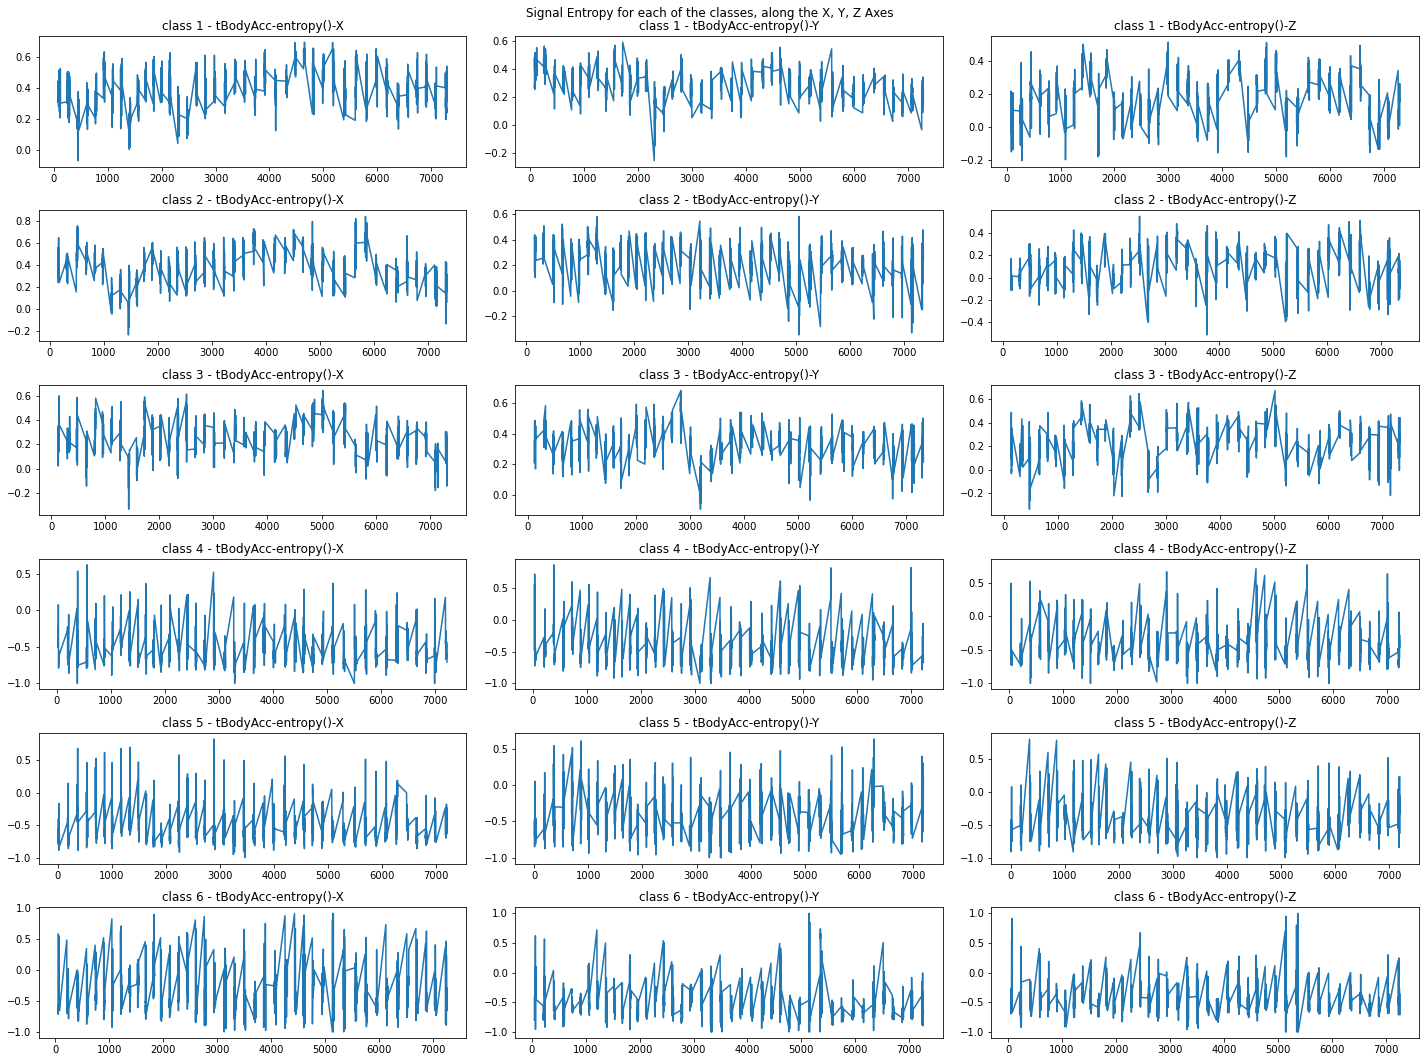

In [201]:
class_1 = df_train[df_train['class'] == 1]
class_2 = df_train[df_train['class'] == 2]
class_3 = df_train[df_train['class'] == 3]
class_4 = df_train[df_train['class'] == 4]
class_5 = df_train[df_train['class'] == 5]
class_6 = df_train[df_train['class'] == 6]


fig, ax = plt.subplots(6,3,figsize=(20,15))
fig.suptitle('Signal Entropy for each of the classes, along the X, Y, Z Axes')

class_1['23 tBodyAcc-entropy()-X'].plot(ax=ax[0, 0], title='class 1 - tBodyAcc-entropy()-X')
class_2['23 tBodyAcc-entropy()-X'].plot(ax=ax[1, 0], title='class 2 - tBodyAcc-entropy()-X')
class_3['23 tBodyAcc-entropy()-X'].plot(ax=ax[2, 0], title='class 3 - tBodyAcc-entropy()-X')
class_4['23 tBodyAcc-entropy()-X'].plot(ax=ax[3, 0], title='class 4 - tBodyAcc-entropy()-X')
class_5['23 tBodyAcc-entropy()-X'].plot(ax=ax[4, 0], title='class 5 - tBodyAcc-entropy()-X')
class_6['23 tBodyAcc-entropy()-X'].plot(ax=ax[5, 0], title='class 6 - tBodyAcc-entropy()-X')

class_1['24 tBodyAcc-entropy()-Y'].plot(ax=ax[0, 1], title='class 1 - tBodyAcc-entropy()-Y')
class_2['24 tBodyAcc-entropy()-Y'].plot(ax=ax[1, 1], title='class 2 - tBodyAcc-entropy()-Y')
class_3['24 tBodyAcc-entropy()-Y'].plot(ax=ax[2, 1], title='class 3 - tBodyAcc-entropy()-Y')
class_4['24 tBodyAcc-entropy()-Y'].plot(ax=ax[3, 1], title='class 4 - tBodyAcc-entropy()-Y')
class_5['24 tBodyAcc-entropy()-Y'].plot(ax=ax[4, 1], title='class 5 - tBodyAcc-entropy()-Y')
class_6['24 tBodyAcc-entropy()-Y'].plot(ax=ax[5, 1], title='class 6 - tBodyAcc-entropy()-Y')

class_1['25 tBodyAcc-entropy()-Z'].plot(ax=ax[0, 2], title='class 1 - tBodyAcc-entropy()-Z')
class_2['25 tBodyAcc-entropy()-Z'].plot(ax=ax[1, 2], title='class 2 - tBodyAcc-entropy()-Z')
class_3['25 tBodyAcc-entropy()-Z'].plot(ax=ax[2, 2], title='class 3 - tBodyAcc-entropy()-Z')
class_4['25 tBodyAcc-entropy()-Z'].plot(ax=ax[3, 2], title='class 4 - tBodyAcc-entropy()-Z')
class_5['25 tBodyAcc-entropy()-Z'].plot(ax=ax[4, 2], title='class 5 - tBodyAcc-entropy()-Z')
class_6['25 tBodyAcc-entropy()-Z'].plot(ax=ax[5, 2], title='class 6 - tBodyAcc-entropy()-Z')
plt.tight_layout()

Text(0.5, 0.98, 'Boxplots for the Signal Entropy along the different Axes')

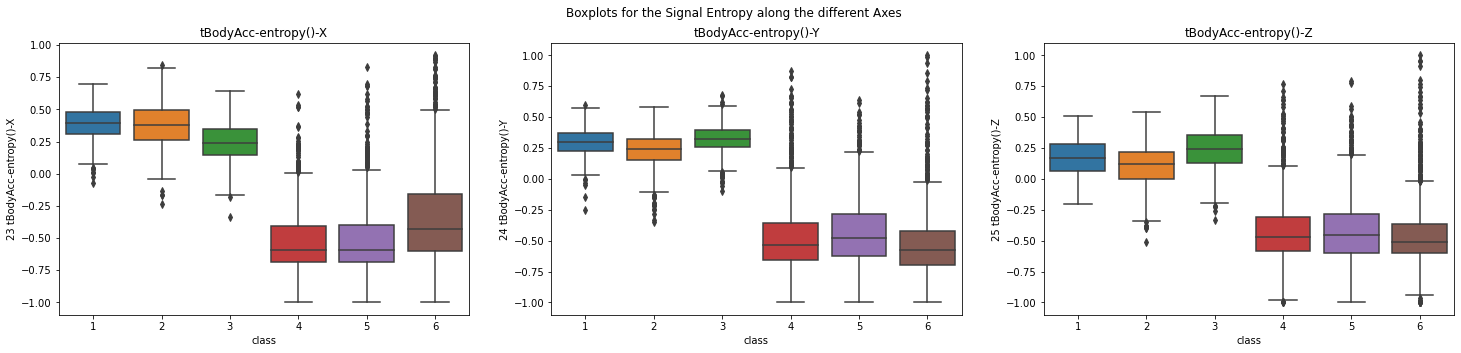

In [202]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(25, 5))
sns.boxplot(x = 'class', y='23 tBodyAcc-entropy()-X', data=df_train, ax=ax1)#, fit_reg = False, scatter_kws={"alpha": 0.2})
sns.boxplot(x = 'class', y='24 tBodyAcc-entropy()-Y', data=df_train, ax=ax2)
sns.boxplot(x = 'class', y='25 tBodyAcc-entropy()-Z', data=df_train, ax=ax3)
ax1.set_title('tBodyAcc-entropy()-X')
ax2.set_title('tBodyAcc-entropy()-Y')
ax3.set_title('tBodyAcc-entropy()-Z')
fig.suptitle('Boxplots for the Signal Entropy along the different Axes')

From the boxplots, and using signal entropy, we can see a clear distinction between the dynamic movements of Walking (1), Walking Upstairs (2), Walking Downstairs (3), and the static movements Sitting (4), Standing (5), Laying (6).
This metric allows us to see an accurate distinction, because the signal entropy is a measure of the spectral power distribution used for detecting abrupt changes, which there are more of for dynamic movements as compared to static movements.

### 2.1.5

Therefore, if the signal entropy(or mean thereof) is above 0, then this represents dynamic movement, else if the signal entropy(or mean thereof) is below zero, then this is static movement.

### 2.1.6

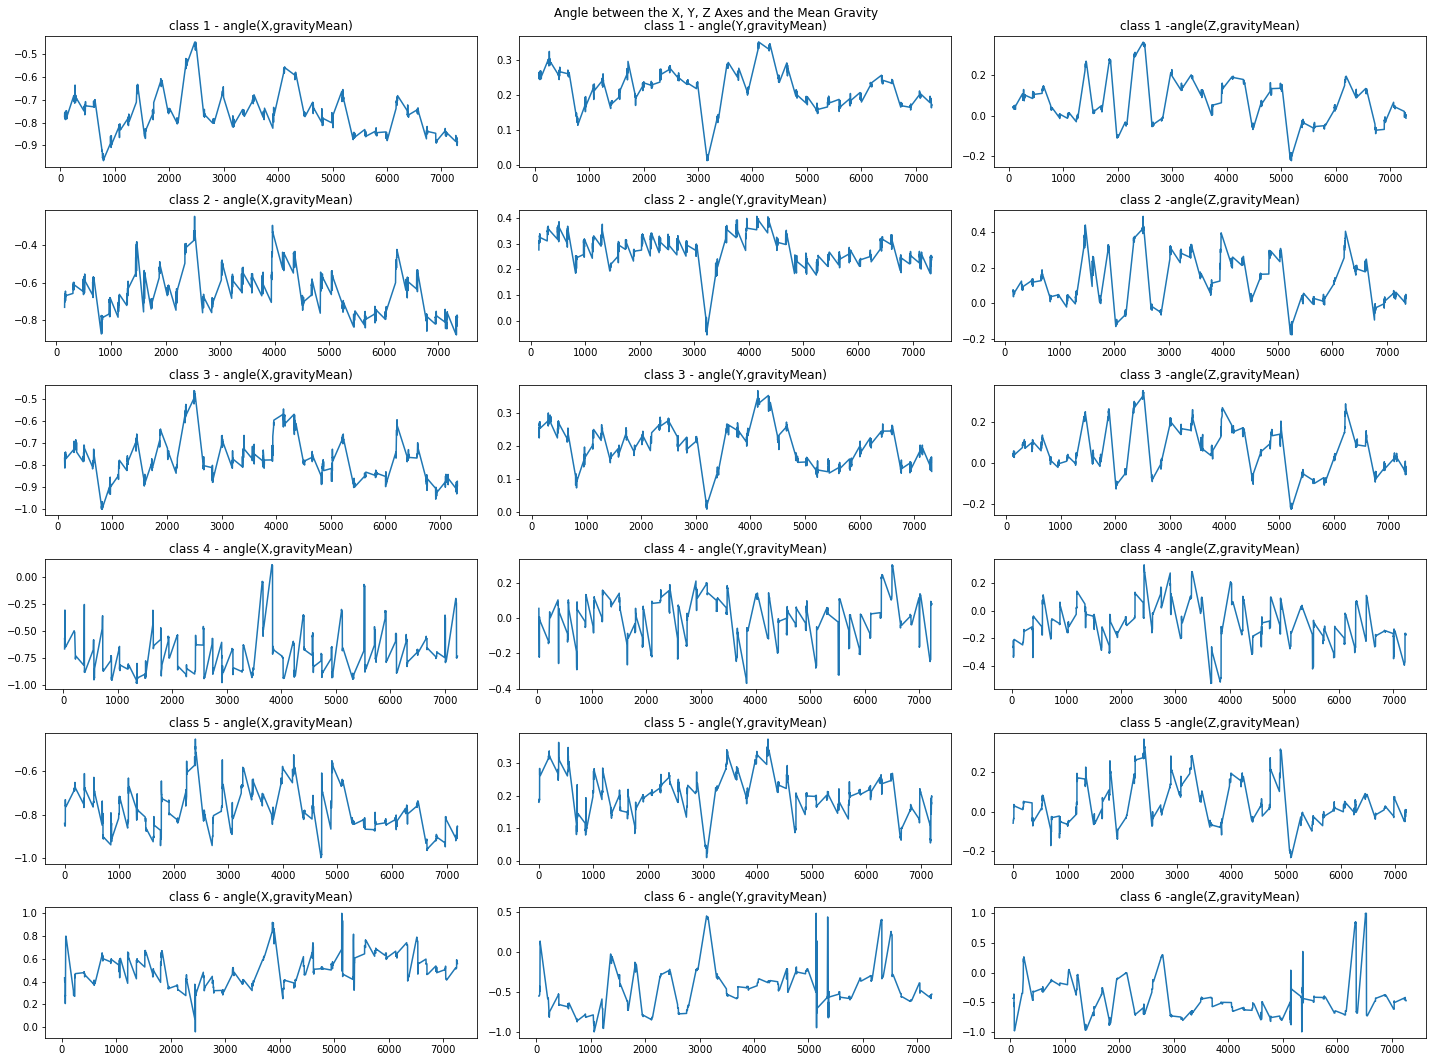

In [203]:
fig, ax = plt.subplots(6,3,figsize=(20,15))
fig.suptitle('Angle between the X, Y, Z Axes and the Mean Gravity')

class_1['559 angle(X,gravityMean)'].plot(ax=ax[0, 0], title='class 1 - angle(X,gravityMean)')
class_2['559 angle(X,gravityMean)'].plot(ax=ax[1, 0], title='class 2 - angle(X,gravityMean)')
class_3['559 angle(X,gravityMean)'].plot(ax=ax[2, 0], title='class 3 - angle(X,gravityMean)')
class_4['559 angle(X,gravityMean)'].plot(ax=ax[3, 0], title='class 4 - angle(X,gravityMean)')
class_5['559 angle(X,gravityMean)'].plot(ax=ax[4, 0], title='class 5 - angle(X,gravityMean)')
class_6['559 angle(X,gravityMean)'].plot(ax=ax[5, 0], title='class 6 - angle(X,gravityMean)')

class_1['560 angle(Y,gravityMean)'].plot(ax=ax[0, 1], title='class 1 - angle(Y,gravityMean)')
class_2['560 angle(Y,gravityMean)'].plot(ax=ax[1, 1], title='class 2 - angle(Y,gravityMean)')
class_3['560 angle(Y,gravityMean)'].plot(ax=ax[2, 1], title='class 3 - angle(Y,gravityMean)')
class_4['560 angle(Y,gravityMean)'].plot(ax=ax[3, 1], title='class 4 - angle(Y,gravityMean)')
class_5['560 angle(Y,gravityMean)'].plot(ax=ax[4, 1], title='class 5 - angle(Y,gravityMean)')
class_6['560 angle(Y,gravityMean)'].plot(ax=ax[5, 1], title='class 6 - angle(Y,gravityMean)')

class_1['561 angle(Z,gravityMean)'].plot(ax=ax[0, 2], title='class 1 -angle(Z,gravityMean)')
class_2['561 angle(Z,gravityMean)'].plot(ax=ax[1, 2], title='class 2 -angle(Z,gravityMean)')
class_3['561 angle(Z,gravityMean)'].plot(ax=ax[2, 2], title='class 3 -angle(Z,gravityMean)')
class_4['561 angle(Z,gravityMean)'].plot(ax=ax[3, 2], title='class 4 -angle(Z,gravityMean)')
class_5['561 angle(Z,gravityMean)'].plot(ax=ax[4, 2], title='class 5 -angle(Z,gravityMean)')
class_6['561 angle(Z,gravityMean)'].plot(ax=ax[5, 2], title='class 6 -angle(Z,gravityMean)')
plt.tight_layout()

Text(0.5, 1.0, '561 angle(Z,gravityMean)')

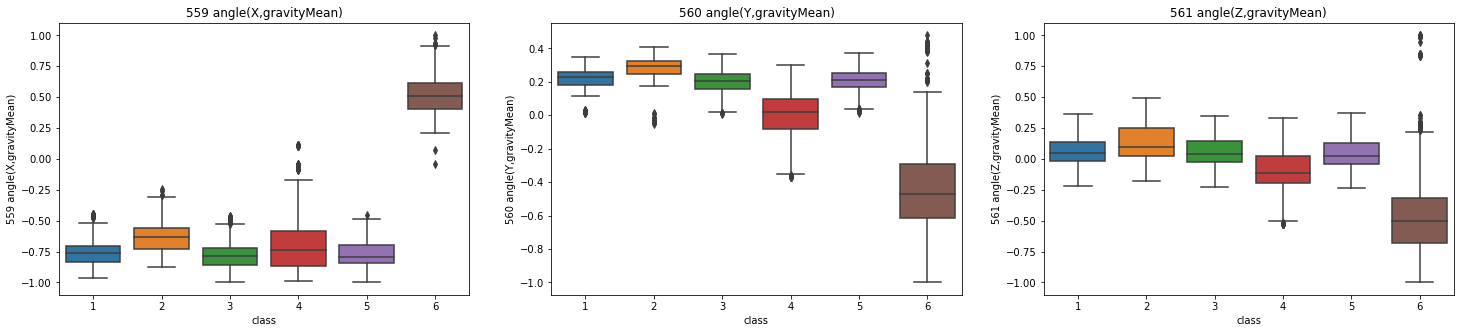

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(25, 5))
sns.boxplot(x = 'class', y='559 angle(X,gravityMean)', data=df_train, ax=ax1)#, fit_reg = False, scatter_kws={"alpha": 0.2})
sns.boxplot(x = 'class', y='560 angle(Y,gravityMean)', data=df_train, ax=ax2)
sns.boxplot(x = 'class', y='561 angle(Z,gravityMean)', data=df_train, ax=ax3)
ax1.set_title('angle(X,gravityMean)')
ax2.set_title('angle(Y,gravityMean)')
ax3.set_title('angle(Z,gravityMean)')

Using the angle between a given axis and the mean direction of gravity, we can clearly see an identifiable difference in angle when a subject is laying down. This is especially clear when looking at the x-axis.

### 2.1.7
If the angle between a subjects x-axis and the mean direction of gravity is positive, then the subject is laying down, else the subject is performing one of the five other activities.

### 2.1.8

In [38]:
%%time
%%capture --no-display
print(x_train_561_arr.shape)
x_tsne = TSNE(n_components=3, perplexity=65).fit_transform(x_train_561_arr)

Wall time: 1min 58s


Text(0.5, 1.0, 't-SNE plot - clustering the different Activities')

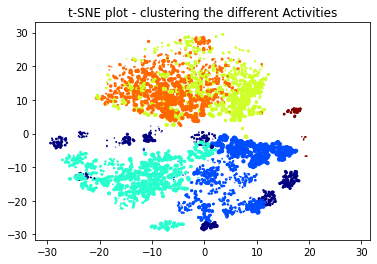

In [206]:
fig, ax = plt.subplots()
ax.scatter(x_tsne[:, 0], x_tsne[:, 1], x_tsne[:, 2], c=y_train_arr, cmap=plt.cm.jet)
ax.set_title('t-SNE plot - clustering the different Activities')

t-SNE is a method predominantly used for visualization, rather than non-linear dimensionality reduction. This is because it can struggle learning the embedding in very complex real-world data. The t-SNE calculates the similarity between points in both high-D and low-D, and thereafter tries to optimize these two measures with a cost function.

Here I used 3 components and a perplexity of 70. It can be seen that it already take 1min 58s to finish, and this increases a lot as components/perplexity is increased. It has been able to seperate the classes to a fair extent. It has been able to completely seperate the lilac/purple from all the others. The yellow and orange have been seperated to a fair extent(the best I was able to achieve), and this is most likely due to correlations between those activities. The greenish and light blue have been seperated to a better extent than the orange and yellow, noting that the seperation between clusters doesn't mean anything. The dark blue has not been grouped together and is dispursed all over the show.

The t-SNE has done a pretty good job and seperating the class labels for activities here!

### 2.1.9

Text(0.5, 1.0, 't-SNE plot - clustering the different Subjects')

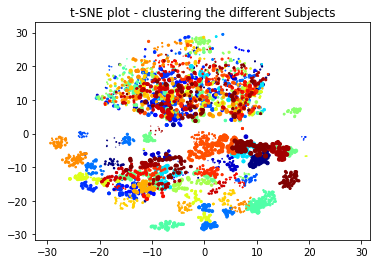

In [207]:
fig, ax = plt.subplots()
ax.scatter(x_tsne[:, 0], x_tsne[:, 1], x_tsne[:, 2], c=train_subject_arr, cmap=plt.cm.jet)
ax.set_title('t-SNE plot - clustering the different Subjects')

When using the t-SNE for seperating the subjects, we can see that due to the number of subjects, the t-SNE has not done a good job. It has been able to seperate some points into clusters in the middle, however most points are all over the show and other non-linear dimensionality reduction methods might be better suited to this more complex task.

### 2.1.10

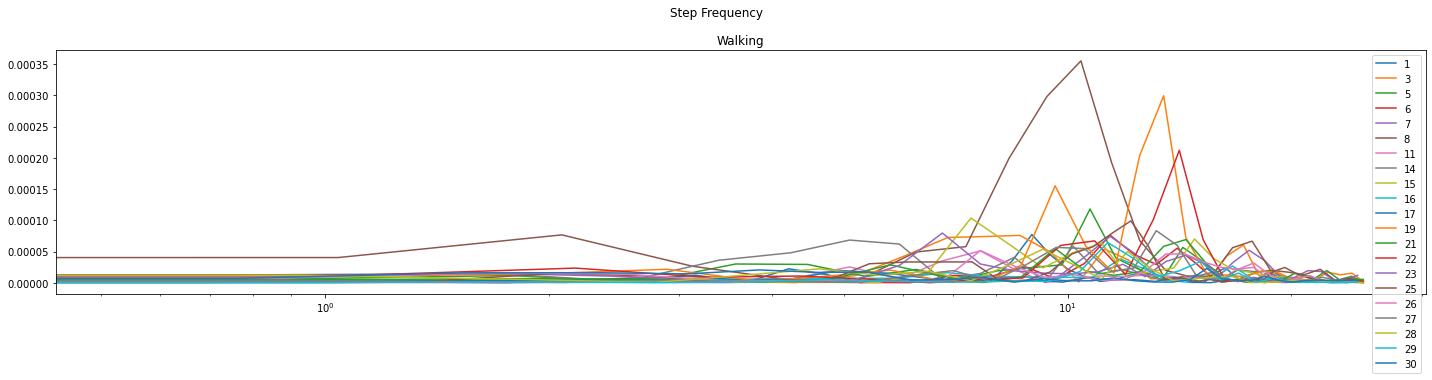

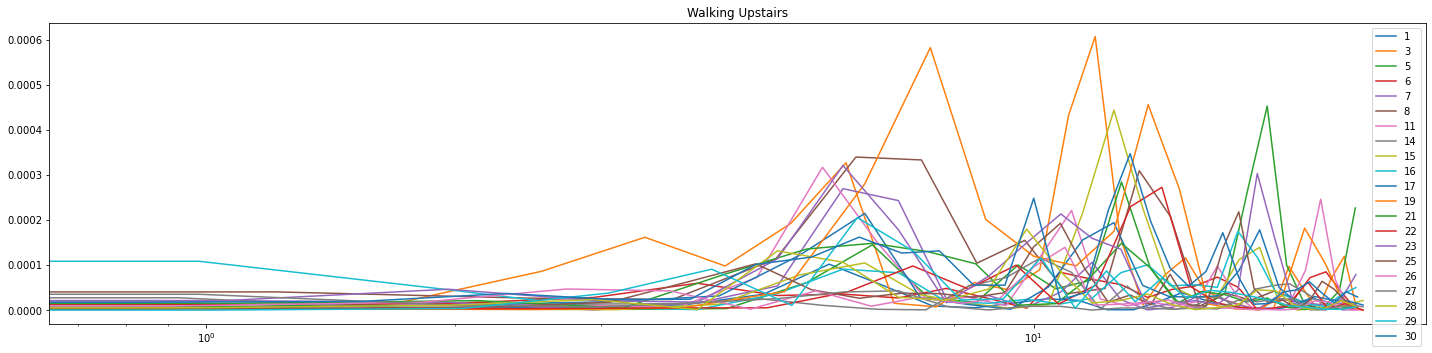

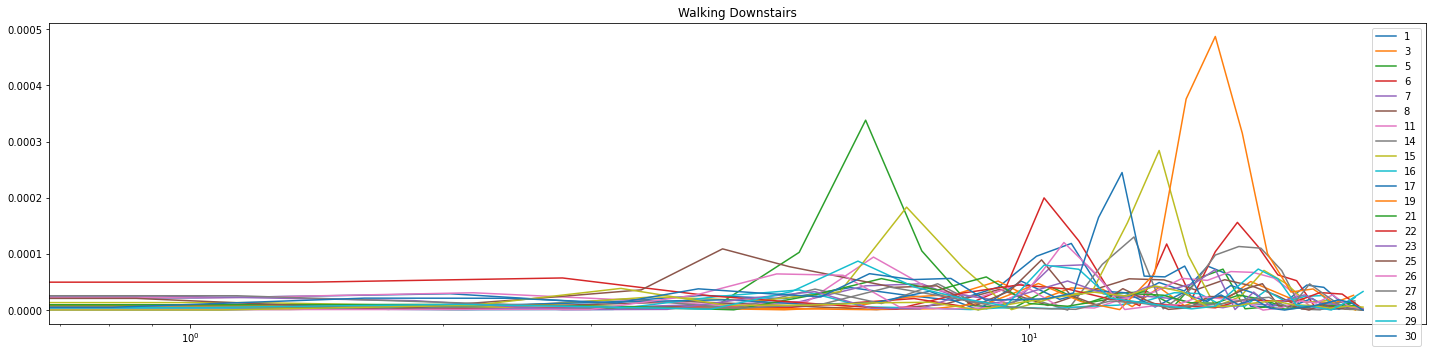

In [208]:
%%capture --no-display
df_walk_1 = df_train[df_train['class'] == 1]
df_walk_2 = df_train[df_train['class'] == 2]
df_walk_3 = df_train[df_train['class'] == 3]

df_walking = df_walk_1.append(df_walk_2)
df_walking = df_walking.append(df_walk_3)
df_walking = df_walking[['1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z', 'class', 'subjects']]

df_walk_1 = df_walk_1[['2 tBodyAcc-mean()-Y', 'subjects']]
df_walk_2 = df_walk_2[['2 tBodyAcc-mean()-Y', 'subjects']]
df_walk_3 = df_walk_3[['2 tBodyAcc-mean()-Y', 'subjects']]

unique_subjects = df_walk_1.subjects.unique()

subjectDict_1 = {elem : pd.DataFrame for elem in unique_subjects}
subjectDict_2 = {elem : pd.DataFrame for elem in unique_subjects}
subjectDict_3 = {elem : pd.DataFrame for elem in unique_subjects}

for key in subjectDict_1.keys():
    subjectDict_1[key] = df_walk_1[:][df_walk_1.subjects == key]
    
for key in subjectDict_2.keys():
    subjectDict_2[key] = df_walk_2[:][df_walk_2.subjects == key]

for key in subjectDict_3.keys():
    subjectDict_3[key] = df_walk_3[:][df_walk_3.subjects == key]
    
fig, ax = plt.subplots(figsize=(20, 5))
fig.suptitle('Step Frequency')
for i in subjectDict_1.keys():
    freqs, psd = signal.welch(subjectDict_1[i].iloc[:,0], fs=50, )
    plt.semilogx(freqs, psd, label=i)
    plt.title('Walking')
    plt.legend()
    plt.tight_layout()

fig, ax = plt.subplots(figsize=(20, 5))
for i in subjectDict_2.keys():
    freqs, psd = signal.welch(subjectDict_2[i].iloc[:,0], fs=50, )
    plt.semilogx(freqs, psd, label=i)
    plt.title('Walking Upstairs')
    plt.legend()
    plt.tight_layout()
    
fig, ax = plt.subplots(figsize=(20, 5))
for i in subjectDict_3.keys():
    freqs, psd = signal.welch(subjectDict_3[i].iloc[:,0], fs=50, )
    plt.semilogx(freqs, psd, label=i)
    plt.title('Walking Downstairs')
    plt.legend()
    plt.tight_layout()

Here, I have plotted the difference in walking step frequency for walking, walking upstairs, and walking downstairs, for interests sake and to potentially gain more insights from the different data. The peak frequencies are different for all plots, allowing us to clearly distinguish between each activity. However our focus here is only on walking. It is interesting to note the vast differences in peak frequencies for different subjects, indiciation that no two people walk the same way. User 3, 6, and 8 exhibit clear and distinct peak frequencies, while all the other subjects, while still having distinct peak frequencies, they are more similar to their other peaks. For all users I have chosen to use '2 tBodyAcc-mean()-Y' as the distinguishing feature above. Below I show the '122 tBodyGyro-mean()-Y' to analyze the step frequency. There are still some users that are completely distinguishable, however more subjects have similar peak frequencies. This is expected, as the triaxial angular velocity, between different subjects, does not change as much as the acceleration step frequency , however is still unique.

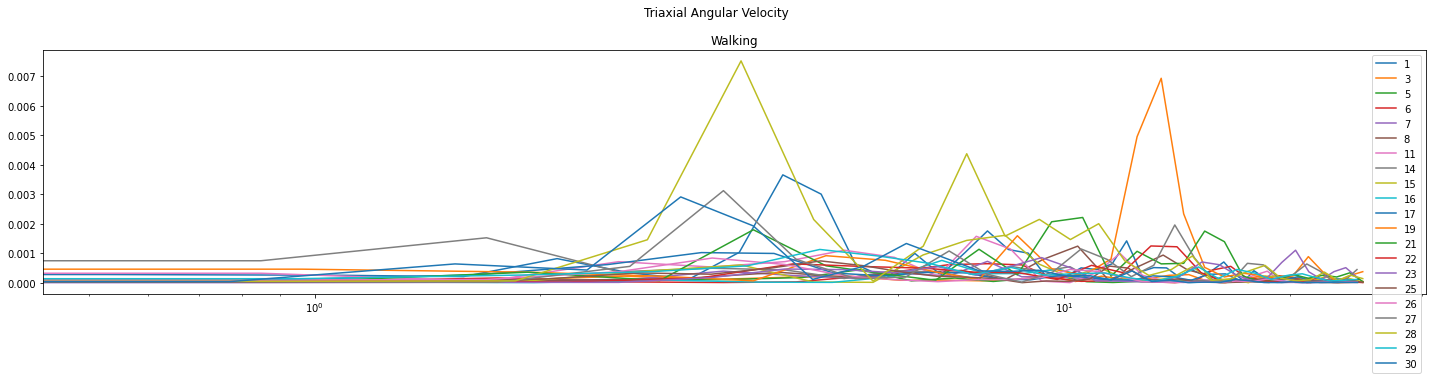

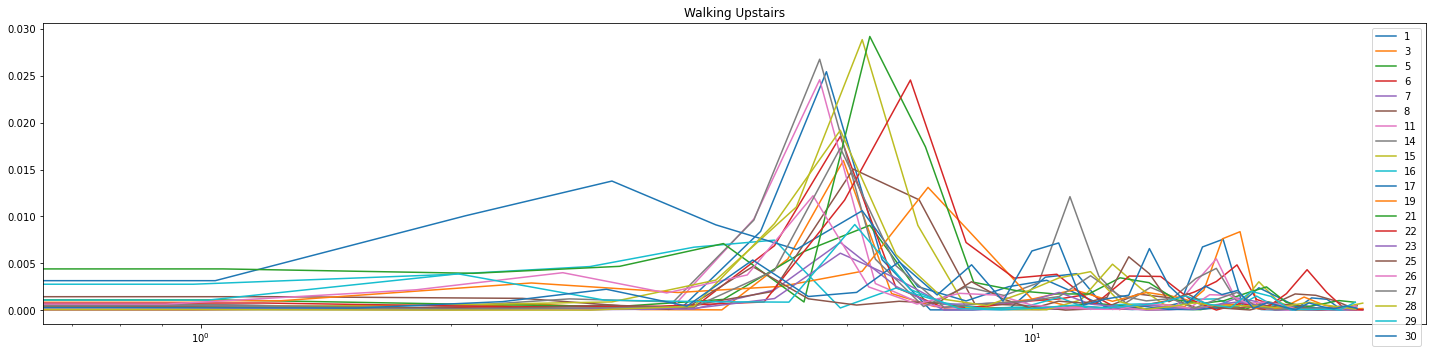

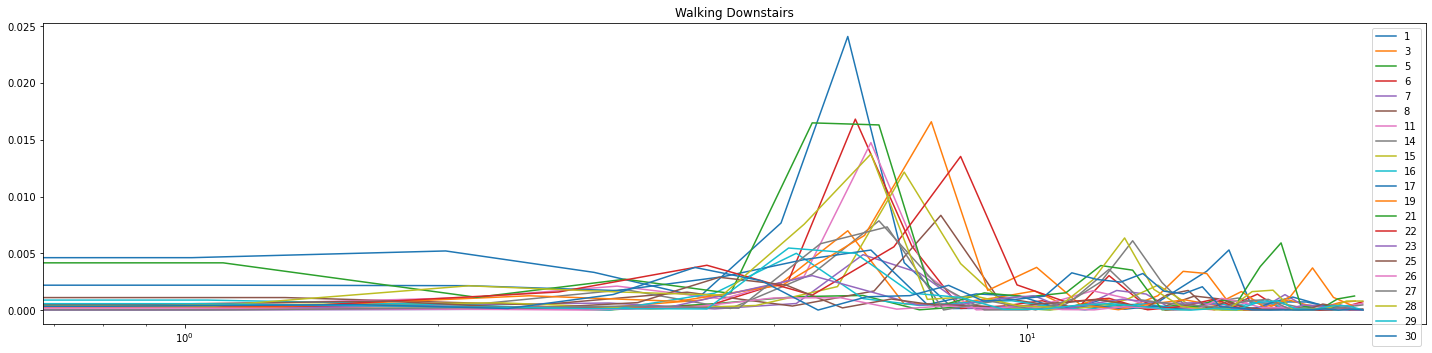

In [209]:
%%capture --no-display
df_walk_1 = df_train[df_train['class'] == 1]
df_walk_2 = df_train[df_train['class'] == 2]
df_walk_3 = df_train[df_train['class'] == 3]

df_walking = df_walk_1.append(df_walk_2)
df_walking = df_walking.append(df_walk_3)
df_walking = df_walking[['121 tBodyGyro-mean()-X', '122 tBodyGyro-mean()-Y', '123 tBodyGyro-mean()-Z', 'class', 'subjects']]

df_walk_1 = df_walk_1[['122 tBodyGyro-mean()-Y', 'subjects']]
df_walk_2 = df_walk_2[['122 tBodyGyro-mean()-Y', 'subjects']]
df_walk_3 = df_walk_3[['122 tBodyGyro-mean()-Y', 'subjects']]

unique_subjects = df_walk_1.subjects.unique()

subjectDict_1 = {elem : pd.DataFrame for elem in unique_subjects}
subjectDict_2 = {elem : pd.DataFrame for elem in unique_subjects}
subjectDict_3 = {elem : pd.DataFrame for elem in unique_subjects}

for key in subjectDict_1.keys():
    subjectDict_1[key] = df_walk_1[:][df_walk_1.subjects == key]
    
for key in subjectDict_2.keys():
    subjectDict_2[key] = df_walk_2[:][df_walk_2.subjects == key]

for key in subjectDict_3.keys():
    subjectDict_3[key] = df_walk_3[:][df_walk_3.subjects == key]
    
fig, ax = plt.subplots(figsize=(20, 5))
fig.suptitle('Triaxial Angular Velocity')
for i in subjectDict_1.keys():
    freqs, psd = signal.welch(subjectDict_1[i].iloc[:,0], fs=50, )
    plt.semilogx(freqs, psd, label=i)
    plt.title('Walking')
    plt.legend()
    plt.tight_layout()

fig, ax = plt.subplots(figsize=(20, 5))
for i in subjectDict_2.keys():
    freqs, psd = signal.welch(subjectDict_2[i].iloc[:,0], fs=50, )
    plt.semilogx(freqs, psd, label=i)
    plt.title('Walking Upstairs')
    plt.legend()
    plt.tight_layout()
    
fig, ax = plt.subplots(figsize=(20, 5))
for i in subjectDict_3.keys():
    freqs, psd = signal.welch(subjectDict_3[i].iloc[:,0], fs=50, )
    plt.semilogx(freqs, psd, label=i)
    plt.title('Walking Downstairs')
    plt.legend()
    plt.tight_layout()

### 2.1.11

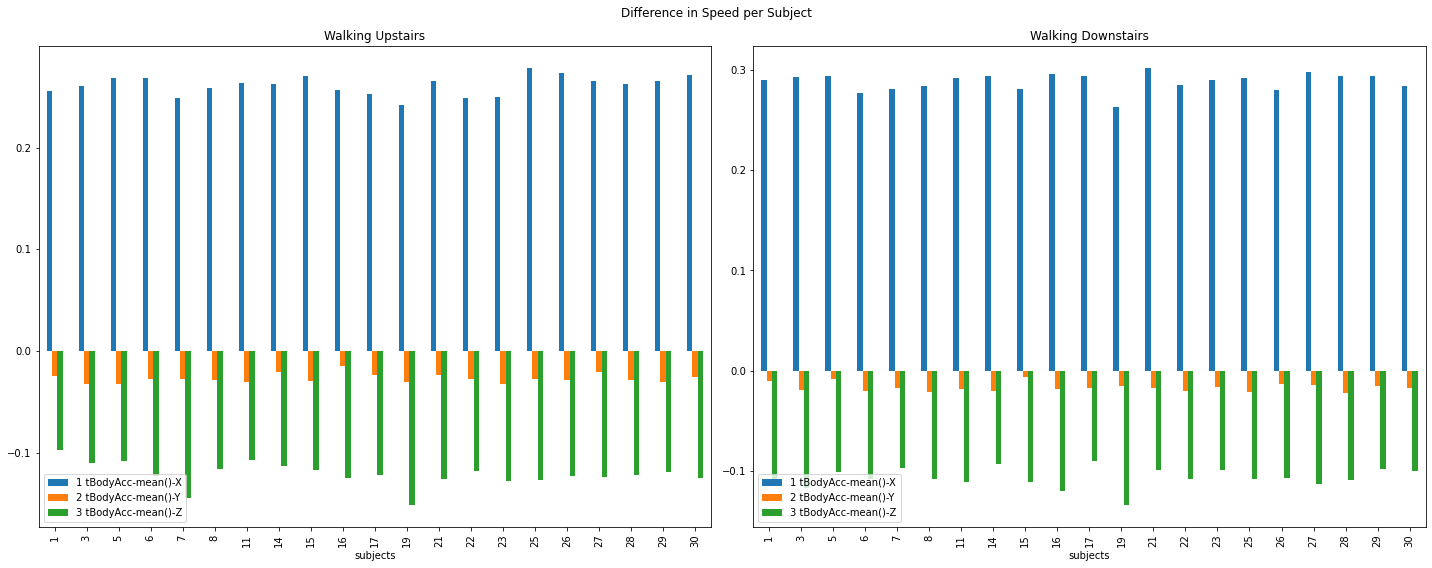

In [210]:
df_walk_up = df_train[df_train['class'] == 2]
df_walk_up = df_walk_up[['1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z', 'subjects']]

df_walk_down = df_train[df_train['class'] == 3]
df_walk_down = df_walk_down[['1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z', 'subjects']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Difference in Speed per Subject')
df_walk_up.groupby('subjects').mean().plot.bar(ax=ax1)
df_walk_down.groupby('subjects').mean().plot.bar(ax=ax2)
ax1.set_title('Walking Upstairs')
ax2.set_title('Walking Downstairs')
plt.tight_layout()

### 2.1.12
Given the findings above, distinguishing the different activities using simple decision rules appears straightforward. Further however, given the unique mannerisms of walking speed and style shown in 2.1.10, I believe it is feasible to distinguish users from walking data, however not using simple decision rules. No two people in this analysis have the same step frequency, acceleration, or walking style, and given this one could differentiate between them using more complex feature analysis. Given the unqiueness, there is still no clear-cut way of identifying a simple decision rule, as was done for distinguishing between activities.

## 2.2

### 2.2.1 - Predict Activities
Logistic Regression Classifier

In [47]:
%%time
%%capture --no-display
lgc = LogisticRegression(random_state=42)
clf = lgc.fit(x_train_561_arr, y_train_arr)
y_pred = clf.predict(x_test_561_arr)
f1_score(y_test_arr, y_pred, average='macro')

0.9588688671587787

Wall time: 2.28 s


Random Forest Classifier

In [61]:
%%time
%%capture --no-display
rfm = RandomForestClassifier(n_estimators=200, random_state=42)
crf = rfm.fit(x_train_561_arr, y_train_arr)
y_pred_rf = crf.predict(x_test_561_arr)
f1_score(y_test_arr, y_pred_rf, average='macro')

0.9270416643832746

Wall time: 22.8 s


Support Vector Classifier

In [66]:
%%time
%%capture --no-display
svc = SVC(gamma='scale', degree=4, random_state=42)
csf = svc.fit(x_train_561_arr, y_train_arr)
y_pred_svc = csf.predict(x_test_561_arr)
f1_score(y_test_arr, y_pred_svc, average='macro')

0.9499067200798831

Wall time: 6.53 s


##### Logisitic Regression Classifier
Requires no hyper-parameter tuning and performs really well in prediciting the activity type. It achieves a 95.89% F1 score, and is also extremely fast clocking a time of only 2.28s.

##### Random Forest Classifier.
For this classifier, the max_depth hyper-parameter was left to the default None. This allows each random forest to expand until every leaf is pure. This showed better results for me, however did increase the time of the algorithm. The n_estimators parameter specifies the number of trees to use in the forest, as this is increase, the time for the algorithm to complete also increases. After 200, this performance was seen to deteriorate and was therefore left at 200 which showed the best performance and achieved an F1-score of 92.7%, while its time to completion was 22.8s.

##### Support Vector Classifier
Also requires minimal hyper-parameter tuning, however setting gamma to 'scale' instead of 'auto' showed better performance. Increasing the degree of polynomial kernel function from 3 to 4 also increases performance, however more than that showed no increase. It achieved an F1-score of 94.99% while taking 6.53s to completion.

##### Comparison
The Logistic Regression Classifier showed the best performance (95.89%) while taking the least amount of time (2.28s). In a close second, both in terms of F1-score (94.99) and time taken (6.53), came the Support Vector Classifier. The Random Forest Classifier performed the worst out of the 3 (92.7%) and also took far longer to complete than the other two (22.8s). 

### 2.2.2 - Predict Subjects
A 70/30 split on the training dataset to produce training and testing datasets for the subjects.

In [136]:
x_tt = df_train[df_train['class'] == 1]
x_tt = x_tt.drop(['class'], axis=1)
train_s = x_tt.sample(frac=0.7)
test_s= x_tt.drop(train_s.index)

x_train_s = train_s.copy()
x_train_s = x_train_s.drop(['subjects'], axis=1)
y_train_s = train_s.subjects

x_test_s = test_s.copy()
x_test_s = x_test_s.drop(['subjects'], axis=1)
y_test_s = test_s.subjects

Logistic Regression Classifier

In [137]:
%%time
%%capture --no-display
lgc = LogisticRegression(random_state=42)
clf = lgc.fit(x_train_s, y_train_s)
y_pred = clf.predict(x_test_s)
f1_score(y_test_s, y_pred, average='macro')

1.0

Wall time: 485 ms


Random Forest Classifier

In [140]:
%%time
%%capture --no-display
rfm = RandomForestClassifier(n_estimators=200, random_state=42)
crf = rfm.fit(x_train_s, y_train_s)
y_pred_rf = crf.predict(x_test_s)
f1_score(y_test_s, y_pred_rf, average='macro')

0.9914601501558022

Wall time: 2.64 s


Support Vector Classifier

In [139]:
%%time
%%capture --no-display
svc = SVC(gamma='scale', degree=4, random_state=42)
csf = svc.fit(x_train_s, y_train_s)
y_pred_svc = csf.predict(x_test_s)
f1_score(y_test_s, y_pred_svc, average='macro')

0.9881939326946697

Wall time: 287 ms


With the dramatic decrease in size by only using the Walking class label, all algorithms show dramatically increased training speeds. They all also perform far better than before, having to only predict the user from a single type of activity (not 6). The Logistic Regression Classifier has the best performance overall (100%), and is the second fastest to complete in terms of time (485ms). The Random Forest Classifier achieves the second best performance (99.14%), however is still quite a bit slower than the other two models (2.64s). The Support Vector Classifier achieves the worst score (98.81%), however only marginally and is the fastest to complete (287ms).

Comparising to the earlier results, the Random Forest Classifier is always the slowest, and requires the most hyper-parameter tuning to achieve good results. The Logistic regression Classifier in these two examples performs the best in both, however its time to completion interchanges with the Support Vector Classifier.

This example further shows the uniqueness in walking between different users, as the models are able to gain insights and learn feature representation for this activity.

## 2.3

### 2.3.1

In [142]:
def select_features(X_train, y_train, X_test, k):
    # configure to select 10 features
    fs = SelectKBest(score_func=mutual_info_classif, k=k)
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [143]:
%%capture --no-display
x5_train, x5_test, fs = select_features(x_train_561, y_train, x_test_561, 5)
x10_train, x10_test, fs = select_features(x_train_561, y_train, x_test_561, 10)
x50_train, x50_test, fs = select_features(x_train_561, y_train, x_test_561, 50)
x100_train, x100_test, fs = select_features(x_train_561, y_train, x_test_561, 100)

df_5 = pd.DataFrame({ "Features": x_train_561.columns, 
                         "Importances": fs.scores_, "Included": fs.get_support()})
df_5.set_index('Importances')

,Features,Included
Importances,,
0.321829,1 tBodyAcc-mean()-X,False
0.201207,2 tBodyAcc-mean()-Y,False
0.171004,3 tBodyAcc-mean()-Z,False
0.874536,4 tBodyAcc-std()-X,True
0.688781,5 tBodyAcc-std()-Y,False
...,...,...
0.348441,"557 angle(tBodyGyroMean,gravityMean)",False
0.058875,"558 angle(tBodyGyroJerkMean,gravityMean)",False
0.687484,"559 angle(X,gravityMean)",False


In [144]:
df_5.head()

,Features,Importances,Included
0,1 tBodyAcc-mean()-X,0.321829,False
1,2 tBodyAcc-mean()-Y,0.201207,False
2,3 tBodyAcc-mean()-Z,0.171004,False
3,4 tBodyAcc-std()-X,0.874536,True
4,5 tBodyAcc-std()-Y,0.688781,False


Logistic Regression Classifier for the different number of features chosen

In [145]:
%%time
%%capture --no-display
lgc = LogisticRegression(random_state=42)
clf = lgc.fit(x5_train, y_train_arr)
y_pred = clf.predict(x5_test)
f1_score(y_test_arr, y_pred, average='macro')

0.7783384169458833

Wall time: 280 ms


In [146]:
%%time
%%capture --no-display
lgc = LogisticRegression(random_state=42)
clf = lgc.fit(x10_train, y_train_arr)
y_pred = clf.predict(x10_test)
f1_score(y_test_arr, y_pred, average='macro')

0.7938933541313756

Wall time: 317 ms


In [147]:
%%time
%%capture --no-display
lgc = LogisticRegression(random_state=42)
clf = lgc.fit(x50_train, y_train_arr)
y_pred = clf.predict(x50_test)
f1_score(y_test_arr, y_pred, average='macro')

0.8740943928326672

Wall time: 444 ms


In [148]:
%%time
%%capture --no-display
lgc = LogisticRegression(random_state=42)
clf = lgc.fit(x100_train, y_train_arr)
y_pred = clf.predict(x100_test)
f1_score(y_test_arr, y_pred, average='macro')

0.8959304560831476

Wall time: 605 ms


Random Forest Classifier for the different number of features chosen

In [149]:
%%time
%%capture --no-display
rfm = RandomForestClassifier(n_estimators=250, random_state=42)
crf = rfm.fit(x5_train, y_train_arr)
y_pred_rf = crf.predict(x5_test)
f1_score(y_test_arr, y_pred_rf, average='macro')

0.7356460157469571

Wall time: 2.74 s


In [150]:
%%time
%%capture --no-display
rfm = RandomForestClassifier(n_estimators=250, random_state=42)
crf = rfm.fit(x10_train, y_train_arr)
y_pred_rf = crf.predict(x10_test)
f1_score(y_test_arr, y_pred_rf, average='macro')

0.7770241418648304

Wall time: 3.72 s


In [151]:
%%time
%%capture --no-display
rfm = RandomForestClassifier(n_estimators=250, random_state=42)
crf = rfm.fit(x50_train, y_train_arr)
y_pred_rf = crf.predict(x50_test)
f1_score(y_test_arr, y_pred_rf, average='macro')

0.8515544728493373

Wall time: 7.53 s


In [152]:
%%time
%%capture --no-display
rfm = RandomForestClassifier(n_estimators=250, random_state=42)
crf = rfm.fit(x100_train, y_train_arr)
y_pred_rf = crf.predict(x100_test)
f1_score(y_test_arr, y_pred_rf, average='macro')

0.8831986826929074

Wall time: 11 s


Support Vector Classifier for the different number of features chosen

In [153]:
%%time
%%capture --no-display
svc = SVC(gamma='scale', degree=4, random_state=42)
csf = svc.fit(x5_train, y_train_arr)
y_pred_svc = csf.predict(x5_test)
f1_score(y_test_arr, y_pred_svc, average='macro')

0.7814851952366298

Wall time: 1.62 s


In [154]:
%%time
%%capture --no-display
svc = SVC(gamma='scale', degree=4, random_state=42)
csf = svc.fit(x10_train, y_train_arr)
y_pred_svc = csf.predict(x10_test)
f1_score(y_test_arr, y_pred_svc, average='macro')

0.7969243302442764

Wall time: 1.44 s


In [155]:
%%time
%%capture --no-display
svc = SVC(gamma='scale', degree=4, random_state=42)
csf = svc.fit(x50_train, y_train_arr)
y_pred_svc = csf.predict(x50_test)
f1_score(y_test_arr, y_pred_svc, average='macro')

0.8716748274120486

Wall time: 1.52 s


In [156]:
%%time
%%capture --no-display
svc = SVC(gamma='scale', degree=4, random_state=42)
csf = svc.fit(x100_train, y_train_arr)
y_pred_svc = csf.predict(x100_test)
f1_score(y_test_arr, y_pred_svc, average='macro')

0.8959392888873845

Wall time: 1.66 s


The reduction in features dramatically increases the training time of the algorithms. Naturally, the smaller the feature set, the smaller the time to completion. Thus, for all algorithms the 5 features chosen was the fastest, with the 100 features chosen being the slowest.

Further, all models show an increase in performance as the size of the feature set is increased. This is expected, as we are capturing more variance in our data, thus allowing the models to learn more complex feature representation allowing them to identify unique charasterics and increase their performance. It can bee seen that the increase from 50 features to 100 features leads to only about a 2% increase in performance for all models. This tells us that at 50 features, we have captured most of the variance and are not likely to increase performance too much after this. Finding a happy medium between the two will most likely allow the models to achieve the performance of the 100 size feature set, while still improving completion times. Despite the SVC only suffering a 0.01ms difference between these two feature sizes, the time differences for the other two is quite large, especifally for the Random Forest Classifer, 6.7s vs 10.1s.

The Logistic Regression Classifier and Support Vector Classifier both achieve 89.59%, with the latter very marginally beating the former when looking at the decimals. This is however non-comparable and they are deemed equal performance. The Random Forest Classifier therefore performs the worst, achieving 88.31%.

The order for time to completion is Logistic Regression Classifier (605ms), Support Vector Classifier (1.66s), Random Forest Classifier (11s).

### 2.3.2

In [157]:
x_tt = df_train[df_train['class'] == 1]
x_tt = x_tt.drop(['class'], axis=1)
train_s = x_tt.sample(frac=0.7)
test_s= x_tt.drop(train_s.index)

x_train_s = train_s.copy()
x_train_s = x_train_s.drop(['subjects'], axis=1)
y_train_s = train_s.subjects

x_test_s = test_s.copy()
x_test_s = x_test_s.drop(['subjects'], axis=1)
y_test_s = test_s.subjects

x5_train, x5_test, fs = select_features(x_train_s, y_train_s, x_test_s, 5)
x10_train, x10_test, fs = select_features(x_train_s, y_train_s, x_test_s, 10)

Logistic Regression Classifier

In [158]:
%%time
%%capture --no-display
lgc = LogisticRegression(random_state=42)
clf = lgc.fit(x5_train, y_train_s)
y_pred = clf.predict(x5_test)
f1_score(y_test_s, y_pred, average='macro')

0.1916832673031948

Wall time: 83 ms


In [159]:
%%time
%%capture --no-display
lgc = LogisticRegression(random_state=42)
clf = lgc.fit(x10_train, y_train_s)
y_pred = clf.predict(x10_test)
f1_score(y_test_s, y_pred, average='macro')

0.2557944033950226

Wall time: 105 ms


Random Forest Classifier

In [160]:
%%time
%%capture --no-display
rfm = RandomForestClassifier(n_estimators=250, random_state=42)
crf = rfm.fit(x5_train, y_train_s)
y_pred_rf = crf.predict(x5_test)
f1_score(y_test_s, y_pred_rf, average='macro')

0.8993454894394272

Wall time: 686 ms


In [161]:
%%time
%%capture --no-display
rfm = RandomForestClassifier(n_estimators=250, random_state=42)
crf = rfm.fit(x10_train, y_train_s)
y_pred_rf = crf.predict(x10_test)
f1_score(y_test_s, y_pred_rf, average='macro')

0.8895806144565854

Wall time: 727 ms


Support Vector Classifier

In [162]:
%%time
%%capture --no-display
svc = SVC(gamma='scale', degree=4, random_state=42)
csf = svc.fit(x5_train, y_train_s)
y_pred_svc = csf.predict(x5_test)
f1_score(y_test_s, y_pred_svc, average='macro')

0.6204773885918735

Wall time: 73 ms


In [163]:
%%time
%%capture --no-display
svc = SVC(gamma='scale', degree=4, random_state=42)
csf = svc.fit(x10_train, y_train_s)
y_pred_svc = csf.predict(x10_test)
f1_score(y_test_s, y_pred_svc, average='macro')

0.40241067374286627

Wall time: 96 ms


It is interesting to note, that on this reduced feature set, the Random Forest Classifier drastically outperforms the other two. It and the Support Vector Classifier however, achieve worse scores with the 10 features when compared with the 5 features. All the times are sub 1s with the Random Forest Classifier still having the worst time.

The F1-scores in best performing order and size of feature set are RFC - 89.93%/5 features, SVC - 62.03%/5 features, LRG - 25.57%/10 features.

Clearly for the LGC the number of features chosen does not capture enough variance for it to achieve a decent F1-score. A similar thing can be said about the SVC despite it achieving a worse score for the 10 features, as it was able to classify better with 5 features, with the increase to 10 not capturing enough variance to adequately be able to distinguish between the subjects given the marginal increase in complexity.

## 2.4

In [216]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import sdss_corrected_spectra
import seaborn as sns

from sklearn.manifold import LocallyLinearEmbedding, Isomap, SpectralEmbedding

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn import manifold, neighbors

from scipy.sparse.csgraph import laplacian as csgraph_laplacian
import scipy.spatial as spt
from scipy.sparse.linalg import eigsh, eigs

from umap import UMAP

def get_eigenvalues(X, n_neighbours, n_clusters):
    """ Helper function that will construct a nearest neighbours
    similarity graph from X, then compute a normalised Laplacian for this graph,
    and then calculate the smallest n_clusters eigenvalues.
    
    This is useful for identifying the number of clusters expected
    in the data when using SpectralEmbedding
    """
    K = kneighbors_graph(X, n_neighbors=n_neighbours, include_self=True)

    K = 0.5 * (K + K.T)


    # diagonal matrix
    L, D = csgraph_laplacian(
            K, normed=True, return_diag=True
        )

    L = L.tocoo()
    diag_idx = L.row == L.col
    L.data[diag_idx] = 1
    # If the matrix has a small number of diagonals (as in the
    # case of structured matrices coming from images), the
    # dia format might be best suited for matvec products:
    n_diags = np.unique(L.row - L.col).size
    if n_diags <= 7:
        # 3 or less outer diagonals on each side
        L = L.todia()
    else:
        # csr has the fastest matvec and is thus best suited to
        # arpack
        L = L.tocsr()

    L *= -1
    vals, vecs = eigsh(
        L, k=n_clusters, sigma=1.0, which="LM", tol=1e-5
    )

    # sort these based on the eigenvalues
    vecs = vecs[:,np.argsort(vals)]
    vals = vals[np.argsort(vals)]
    plt.plot(vals)
    
    return vecs, vals


def plot_2d(X, labels, title):
    plt.figure(figsize=(10,10))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.jet)
    plt.xlabel('coefficient 1')
    plt.ylabel('coefficient 2')
    plt.title(title)
    
    

def mask_outliers(X):
    BT = neighbors.BallTree(X)
    dist, ind = BT.query(X, 10)
    dist_to_n = dist[:, -1]
    dist_to_n -= dist_to_n.mean()
    std = np.std(dist_to_n)
    flag = (dist_to_n > 0.25 * std)
    print(" - removing {0} outliers for plot".format(flag.sum()))
    return flag

### 2.4.1

In [217]:
X_train = StandardScaler().fit_transform(x_train_561_arr)
X_test = StandardScaler().fit_transform(x_test_561_arr)

PCA

Total Variance Captured by Principle Components: 56.80020451545715%


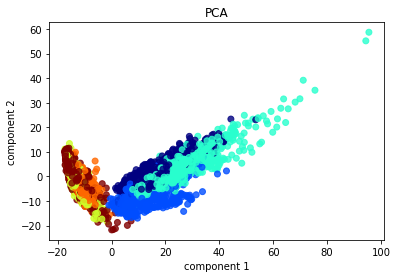

In [311]:
pca = PCA(n_components=2)

x_pca_train = pca.fit_transform(X_train)
x_pca_test = pca.fit_transform(X_test)
print('Total Variance Captured by Principle Components: {0}%'.format(pca.explained_variance_ratio_.sum()*100.))
plt.scatter(x_pca_train[:, 0], x_pca_train[:, 1], c=y_train_arr, cmap=plt.cm.jet, alpha=0.8, marker='o')
plt.title('PCA')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

ISOMAP

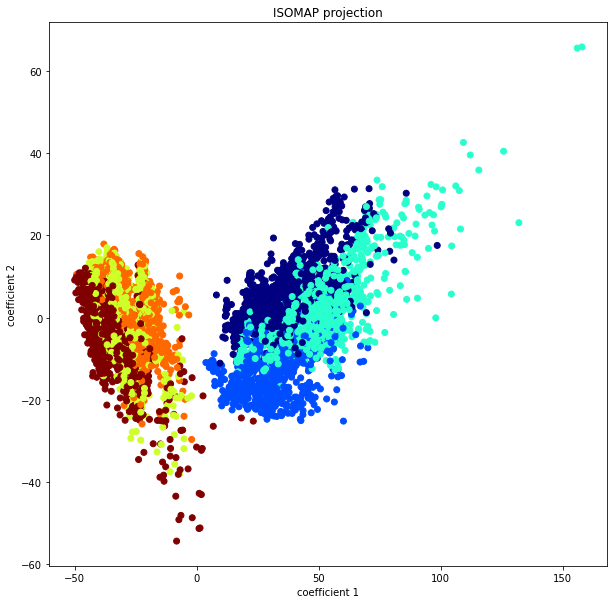

In [297]:
iso = Isomap(n_components=2, n_neighbors=200)

x_iso_train = iso.fit_transform(X_train)
x_iso_test = iso.fit_transform(X_test)
plot_2d(x_iso_train, y_train_arr, 'ISOMAP projection')

UMAP

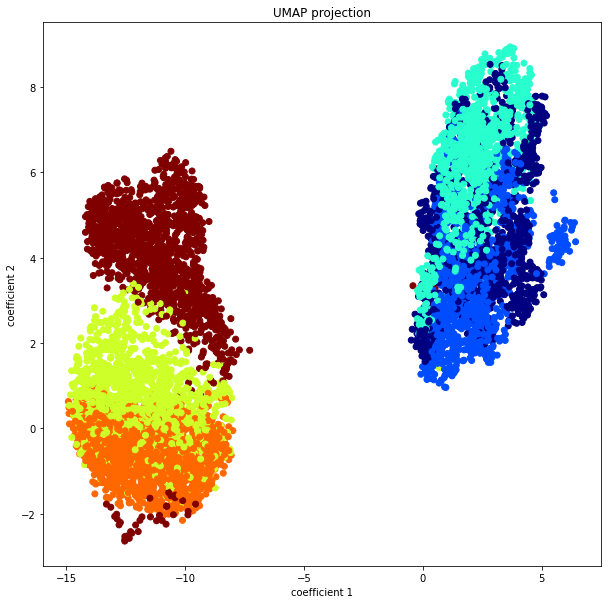

In [275]:
umap_obj = UMAP(
    n_components=3, 
    metric="euclidean",
    n_neighbors=150, 
    min_dist=0.9, # [0,1)
    random_state=42
)

x_umap_train = umap_obj.fit_transform(X_train)
x_umap_test = umap_obj.fit_transform(X_test)

plot_2d(x_umap_train, y_train_arr, 'UMAP projection')

 - removing 188 outliers for plot


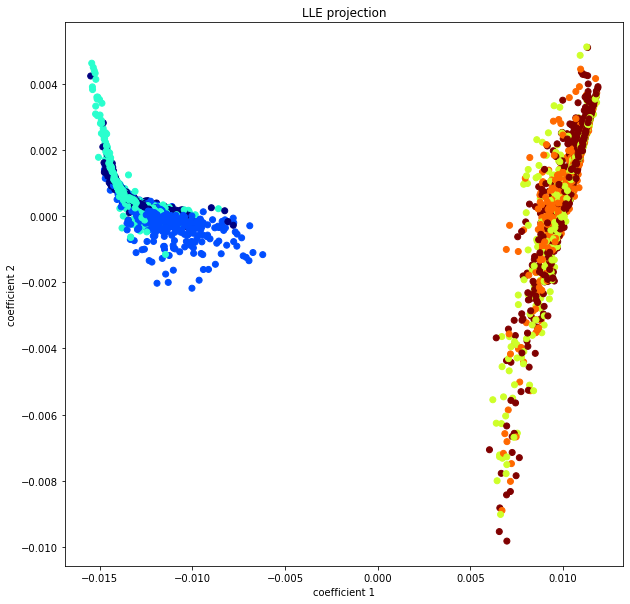

In [282]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=200, method='modified', eigen_solver='auto', random_state=42) 

x_lle_train = lle.fit_transform(X_train)
x_lle_test = lle.fit_transform(X_test)

flag = mask_outliers(x_lle_train)

plot_2d(x_lle_train[~flag], y_train_arr[~flag], 'LLE projection')

From above, it can be seen that the PCA with 3 components only captures 59% of the variance in the data. Conducting some tests, it was found that when using 100 components for the PCA, then only did it capture 95%. This is not reasonable, so it is kept as a baseline for comparison to the non-linear dimensionality reduction techniques. It can be further seen that PCA has found some type of clusters, however is unable to seperate the clusters, even just marginally so in terms of dynamic movement and static movement.

This data is very sparse, as it consists of 561 features of different accelerometer and gyroscope readings for 30 different subjects. As previously discussed these readings vary compared to one another - the body acceleration, gravity acceleration, triaxial angular velocity will produce very different readings - and then this is further dispersed across the 30 subjects for which no two people move in the same way. 

It is known that Isomap overestimates large distances when considering sparse data, and this can be seen above in the distances between the points in the map. This is because it tries to preserve both small and large distances, thus trying to preserve distances between similar readings within the same feature, as well as distance between two features on opposite end. It further overestimates these distances as it only uses approximations of true geodesic distances. Thus poorly constructed neighbourhood will distort the resulting embedding. The number of neighbours chosen, , was found to be the best! however due to these described difficulties it still is unable to accurately seperate the cluster beyond seperating the dynamic and static movements.

UMAP is quite scalable in terms of any distance metric may be used. It does however make one assumption, which is that all points lie on a connected manifold, which may be an issue with maximally sparse data. From the above plots however, we can see that it is able to seperate clusters between the dynamic and static movements, as well as distinguish laying(red) from sitting and standing quite well. It shows the best seperation of clusters, however this may not necessarily be meaningful when we come to test each of these learnt components on our models.

Modified LLE finds neighbours in high-D and maps these to the low-D representation we are looking for. One incurred issue of its implementation is that it optimizes patches of local weights, and not distances themselves. This can be seen in the above plot where it seperates dynamic and static movements, however is unable to even marginally distinguish between the activities in these two borader groups. This is a very real-world dataset, with lots of featurs and very sparse data, thus LLE can be expected to perform poorly.

UMAP especially, with Isomap just thereafter have been able to learn more meaningful embeddings, as compared with LLE and PCA.

### 2.4.2

## Logistic Regression Classifier

PCA

In [312]:
%%time
%%capture --no-display
lgc = LogisticRegression(random_state=42)
clf = lgc.fit(x_pca_train, y_train_arr)
y_pred = clf.predict(x_pca_test)
f1_score(y_test_arr, y_pred, average='macro')

0.5350056734054714

Wall time: 297 ms


ISOMAP

In [313]:
%%time
%%capture --no-display
lgc = LogisticRegression(random_state=42)
clf = lgc.fit(x_iso_train, y_train_arr)
y_pred = clf.predict(x_iso_test)
f1_score(y_test_arr, y_pred, average='macro')

0.35992880880704287

Wall time: 299 ms


UMAP

In [314]:
%%time
%%capture --no-display
lgc = LogisticRegression(random_state=42)
clf = lgc.fit(x_umap_train, y_train_arr)
y_pred = clf.predict(x_umap_test)
f1_score(y_test_arr, y_pred, average='macro')

0.19681170292573144

Wall time: 309 ms


LLE

In [315]:
%%time
%%capture --no-display
lgc = LogisticRegression(random_state=42)
clf = lgc.fit(x_lle_train, y_train_arr)
y_pred = clf.predict(x_lle_test)
f1_score(y_test_arr, y_pred, average='macro')

0.002532928064842958

Wall time: 87 ms


## Random Forest

PCA

In [316]:
%%time
%%capture --no-display
rfm = RandomForestClassifier(n_estimators=250, random_state=42)
crf = rfm.fit(x_pca_train, y_train_arr)
y_pred_rf = crf.predict(x_pca_test)
f1_score(y_test_arr, y_pred_rf, average='macro')

0.5017145933097242

Wall time: 2.61 s


ISOMAP

In [317]:
%%time
%%capture --no-display
rfm = RandomForestClassifier(n_estimators=250, random_state=42)
crf = rfm.fit(x_iso_train, y_train_arr)
y_pred_rf = crf.predict(x_iso_test)
f1_score(y_test_arr, y_pred_rf, average='macro')

0.3529390668770243

Wall time: 2.17 s


UMAP

In [318]:
%%time
%%capture --no-display
rfm = RandomForestClassifier(n_estimators=250, random_state=42)
crf = rfm.fit(x_umap_train, y_train_arr)
y_pred_rf = crf.predict(x_umap_test)
f1_score(y_test_arr, y_pred_rf, average='macro')

0.16985012959683835

Wall time: 1.78 s


LLE

In [319]:
%%time
%%capture --no-display
rfm = RandomForestClassifier(n_estimators=250, random_state=42)
crf = rfm.fit(x_lle_train, y_train_arr)
y_pred_rf = crf.predict(x_lle_test)
f1_score(y_test_arr, y_pred_rf, average='macro')

0.003571428571428572

Wall time: 2.38 s


## Support Vector Classifier

PCA

In [320]:
%%time
%%capture --no-display
svc = SVC(gamma='auto', random_state=42)
csf = svc.fit(x_pca_train, y_train_arr)
y_pred_svc = csf.predict(x_pca_test)
f1_score(y_test_arr, y_pred_svc, average='macro')

0.5115503905164303

Wall time: 4.74 s


ISOMAP

In [321]:
%%time
%%capture --no-display
svc = SVC(gamma='auto', random_state=42)
csf = svc.fit(x_iso_train, y_train_arr)
y_pred_svc = csf.predict(x_iso_test)
f1_score(y_test_arr, y_pred_svc, average='macro')

0.3365582714070699

Wall time: 7.95 s


UMAP

In [322]:
%%time
%%capture --no-display
svc = SVC(gamma='auto', random_state=42)
csf = svc.fit(x_umap_train, y_train_arr)
y_pred_svc = csf.predict(x_umap_test)
f1_score(y_test_arr, y_pred_svc, average='macro')

0.05137772675086108

Wall time: 1.08 s


LLE

In [323]:
%%time
%%capture --no-display
svc = SVC(gamma='auto', random_state=42)
csf = svc.fit(x_lle_train, y_train_arr)
y_pred_svc = csf.predict(x_lle_test)
f1_score(y_test_arr, y_pred_svc, average='macro')

0.05129677481098669

Wall time: 6.33 s


### 2.4.3

The initial baseline models from 2.2 showed really good performance for both predicting activities, as well as predicting users when just considering Walking. Naturally, both of these still used all 561 features, with the models predicting activities using all 6 classess. This dimension is 7352x561 and this results in very slow training times, with the Random Forest Classifier taking 22.8s to finish training. Their performance was really good, and this shows the trade-off between training time and performance. When considering the 5, 10, 50 and 100 features next, it was shown that we can reduce training time, while still capturing enough of the variance for reasonable performance. We saw that 100 features performed the best, however only by 2% for all models when compared with 50 features. One could find a happy medium between the two, restricting the number of features, while still possibly achieving the same results as was seen for 100 features. Similarly when considering feature extraction, we can see great time to completion increases when compared with the initial baselines. We however see very poor performance from all, with PCA having the best performance in terms of F1-score, followed by Isomap, UMAP, and LLE in last. This shows the huge trade-off between training time, performance and interpretability. PCA when visualized is not fully interpretable, while Isomap and UMAP are far better for this. They however show worse performance than PCA. This shows that most of the time, none of these techniques should be performed in isolation and should be used together in an iterative manner. Feature extraction can be used to extract and create new features, which can then be augmented with the original dataset, after which feature selection may be used to determine weather these will actually help improve performance. These two methods should most of the time be used to improve training times, as often the whole dataset is not required and may actually include features that harm performance as well.